In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_data = pd.read_csv('Employee_Data.csv', sep =',')
df_data.head()

,Age,Employment_type,Salary,Education,Marital-status,Relationship,Gender,Hours_per_week
0,39,State-gov,77516,Bachelors,Never-married,Not-in-family,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Husband,Male,13
2,38,Private,215646,HS-grad,Divorced,Not-in-family,Male,40
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
4,28,Private,338409,Bachelors,Married-civ-spouse,Wife,Female,40


In [ ]:
df_data.columns

Index(['Age', 'Employment_type', 'Salary', 'Education', 'Marital-status',
       'Relationship', 'Gender', 'Hours_per_week'],
      dtype='object')

# (1)

# Following are Continuous Coloumns / Variables

In [ ]:
num_cols = df_data._get_numeric_data().columns
cont_cols = []
for i in num_cols:
  if(len(df_data[i].unique())) > int(df_data.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['Age', 'Salary', 'Hours_per_week']


# Following are Categorical Coloumns / Variables

In [ ]:
cat_cols = list(set(df_data.columns) - set(cont_cols))
cat_cols

['Marital-status', 'Gender', 'Education', 'Employment_type', 'Relationship']

# (2) Univariate Analysis

[Text(0, 0, ' Not-in-family'),
 Text(0, 0, ' Husband'),
 Text(0, 0, ' Wife'),
 Text(0, 0, ' Own-child'),
 Text(0, 0, ' Unmarried'),
 Text(0, 0, ' Other-relative')]

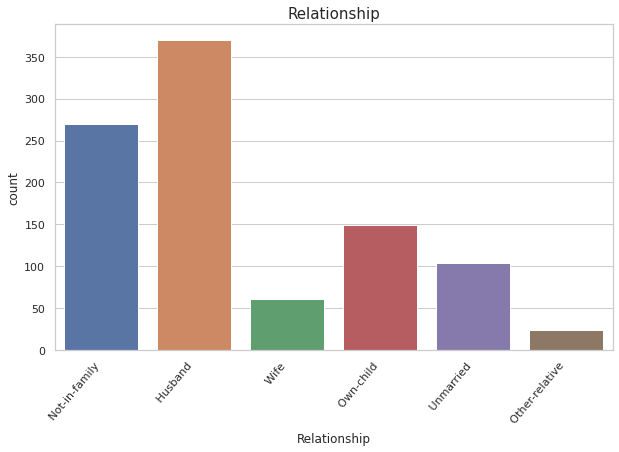

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.countplot(x = 'Relationship', data=df_data)
plt.title("Relationship", fontdict={'fontsize' : 15})
a.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

In the dataset provided, Employee with Relationship status:

Husband (Highest) : >350

Not-in-family : >250

Wife : 50

Own Child : 150

Unmarried : >100

Other Relative : < 50

Text(0.5, 1.0, 'Employment Type')

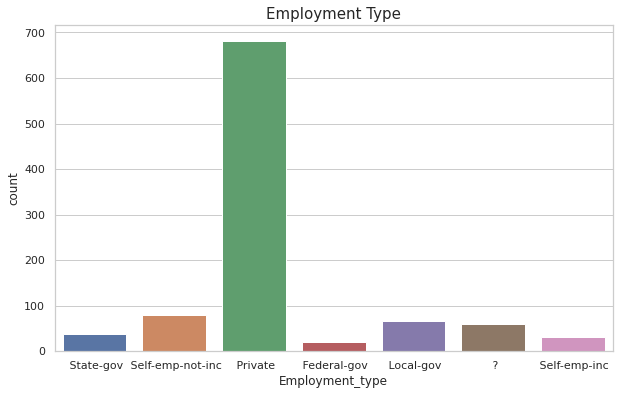

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(df_data.Employment_type)
plt.title("Employment Type", fontdict={'fontsize' : 15})

In the dataset provided, Employment type :

State-Gov : < 100 (50 approx)

Self-Employed-not-inc : < 100 (90 approx)

Private (Highest) : < 700

Federal-Gov : < 100 (20 approx)

Local-Gov : < 100 (70 approx)



[Text(0, 0, ' Bachelors'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Some-college'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 10th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' Preschool'),
 Text(0, 0, ' 12th')]

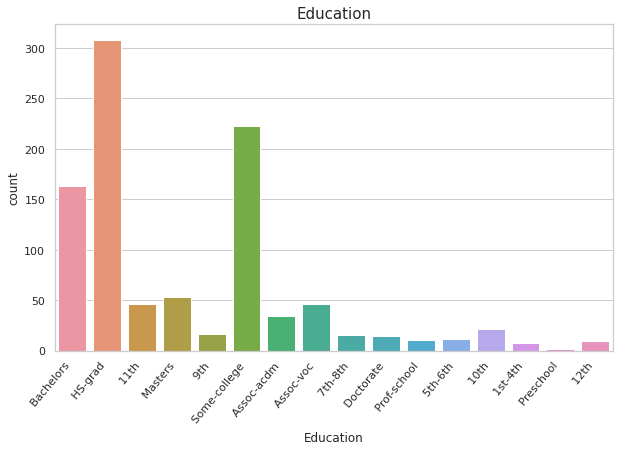

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.countplot(x = 'Education', data=df_data)
plt.title("Education", fontdict={'fontsize' : 15})
a.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

From the above plots, inference can be drawn as maximum employee have their education qualification as 'Bachelors' and 'HS-grad'

[Text(0, 0, ' Never-married'),
 Text(0, 0, ' Married-civ-spouse'),
 Text(0, 0, ' Divorced'),
 Text(0, 0, ' Married-spouse-absent'),
 Text(0, 0, ' Separated'),
 Text(0, 0, ' Married-AF-spouse'),
 Text(0, 0, ' Widowed')]

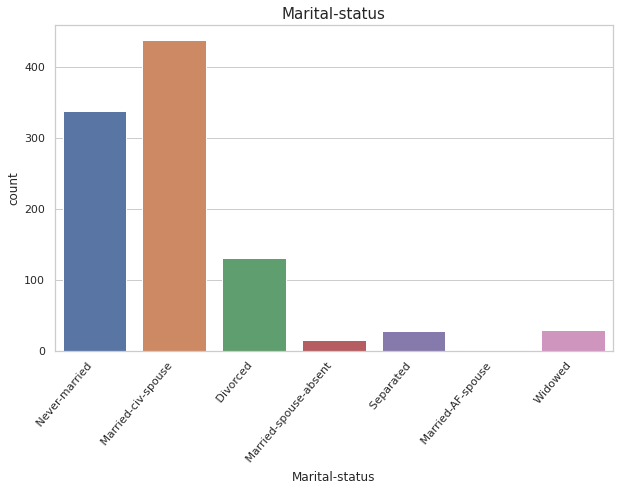

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
a = sns.countplot(x = 'Marital-status', data=df_data)
plt.title("Marital-status", fontdict={'fontsize' : 15})
a.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")

From the above plots, inference can be drawn as maximum employee's Marital Status is "Married-civ-spouse" and many other as "Never-Married". 

Text(0.5, 1.0, 'Gender')

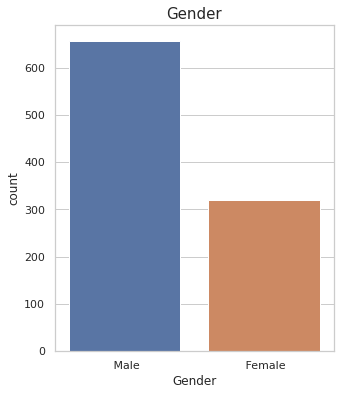

In [26]:
fig, ax = plt.subplots(figsize=(5,6))
sns.countplot(df_data.Gender)
plt.title("Gender", fontdict={'fontsize' : 15})

About 650 (approx) employee are male and rest are female

Text(0.5, 1.0, 'Age')

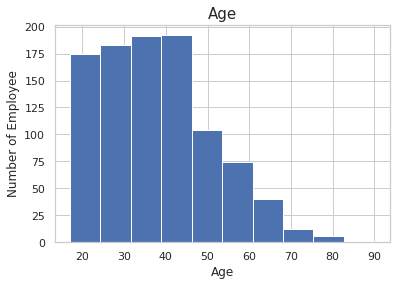

In [31]:
plt.hist(df_data['Age'],histtype= 'barstacked' )
plt.xlabel("Age")
plt.ylabel("Number of Employee")
plt.title("Age", fontdict={'fontsize':15})

Maximum Employees are in the age group of 20 - 45 years

Text(0.5, 1.0, 'SALARY')

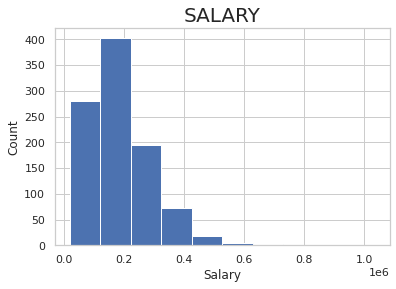

In [32]:
plt.hist(df_data['Salary'],histtype= 'barstacked' )
plt.xlabel("Salary")
plt.ylabel("Count")
plt.title("SALARY", fontdict={'fontsize' : 20})

Maximum employe's have the salary ranging from 100000 to 300000

Text(0.5, 1.0, 'HOURS PER WEEK')

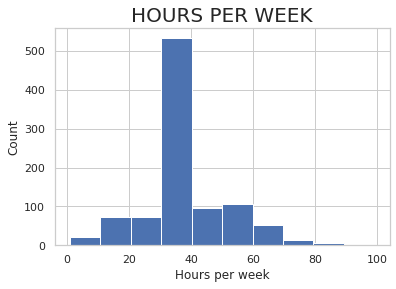

In [33]:
plt.hist(df_data['Hours_per_week'],histtype= 'barstacked' )
plt.xlabel("Hours per week")
plt.ylabel("Count")
plt.title("HOURS PER WEEK", fontdict={'fontsize' : 20})

Maximum employee's working hour per week lies between 30 to 50

#(3) Bivariate Analysis

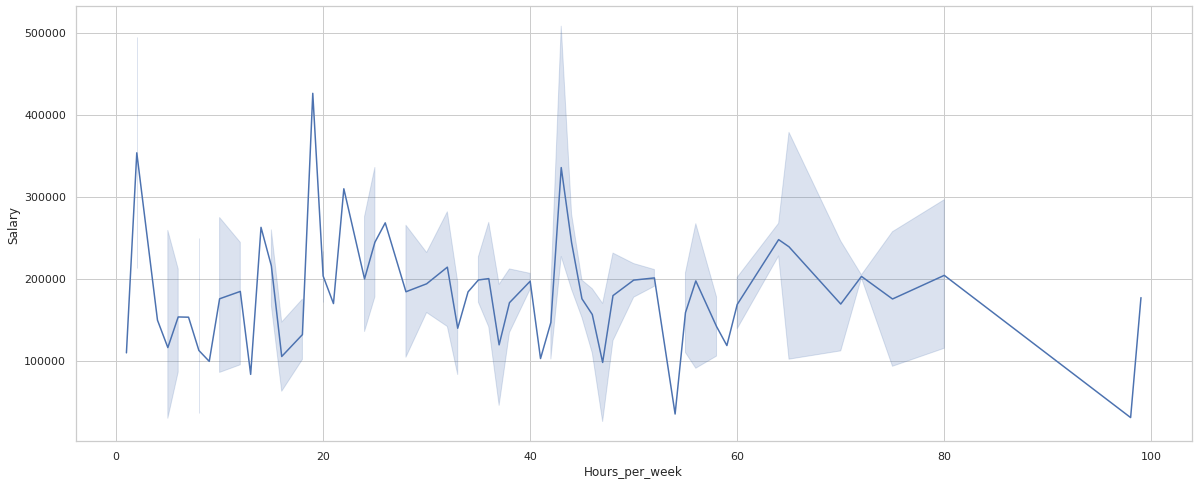

In [36]:
fig, a = plt.subplots(figsize=(20,8))
sns.lineplot(x="Hours_per_week", y="Salary", data=df_data)


For Working Hour ranging from 10 to 50 per week:

Minimum Salary is seen to be 100000 and maximum to be 450000

For Working Hour ranging from 60 to 99 per week:

Minimum salary is seen to be 50000(approx) and maximum to be 250000

Hence Salary is more for lesser working hour and vice versa.

# (4)

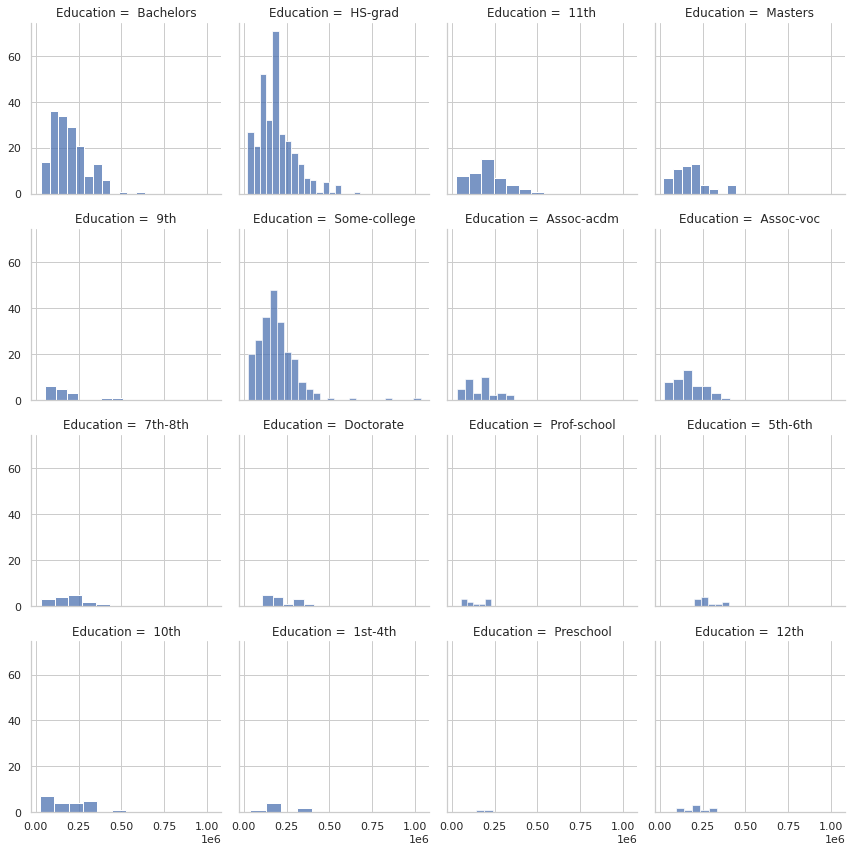

In [38]:
g = sns.FacetGrid(df_data, col = 'Education', col_wrap=4)
g.map_dataframe(sns.histplot, x = 'Salary')

Employee with highest Salary have their education from Some College, HS-grad, Bachelor's and Doctorate

# (5)

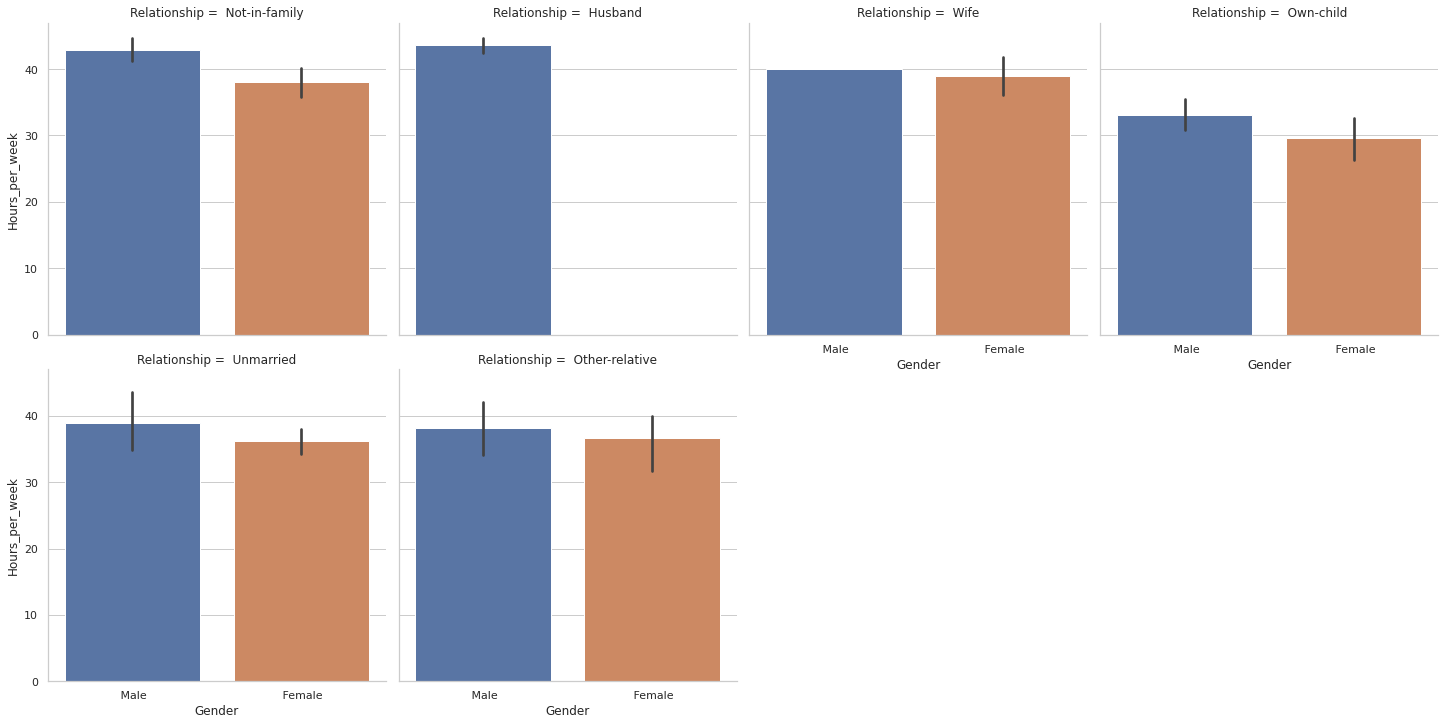

In [42]:
sns.catplot('Gender','Hours_per_week', data =df_data, col = 'Relationship', col_wrap=4, kind='bar')

From the above plots we see that:

Male Employee whose relationship status is "Not-in-family" work for more hours in a week than the female workers with same relationship status.

Male Employee who are "Husband" work for more hours in a week than the Female employee who are "wife"

Male and Female Employee whose relationship status is "Own-Child" work for almost same number of hours.

"Unmarried" male employee's working hour's are more than the male.



# (6)

In [50]:
d=df_data[(df_data['Salary'] > 150000) & (df_data['Gender'].str.contains ('Male')) & (df_data['Marital-status'].str.contains('Married-civ-spouse'))]
print(d.head())
len(d.index)

    Age    Employment_type  Salary  ... Relationship Gender Hours_per_week
3    53            Private  234721  ...      Husband   Male             40
7    52   Self-emp-not-inc  209642  ...      Husband   Male             45
9    42            Private  159449  ...      Husband   Male             40
10   37            Private  280464  ...      Husband   Male             80
15   34            Private  245487  ...      Husband   Male             45

[5 rows x 8 columns]


226

Males that have Marital status ‘Married-civ-spouse’ are earning above 150,000 are 226 in number

# (7)

In [46]:
x = df_data[df_data['Relationship'].str.contains('Not-in-family')]
print(x['Age'].mean())
y = df_data[df_data['Marital-status'].str.contains("Divorced")]
print(y['Age'].mean())

37.48518518518519
42.03076923076923


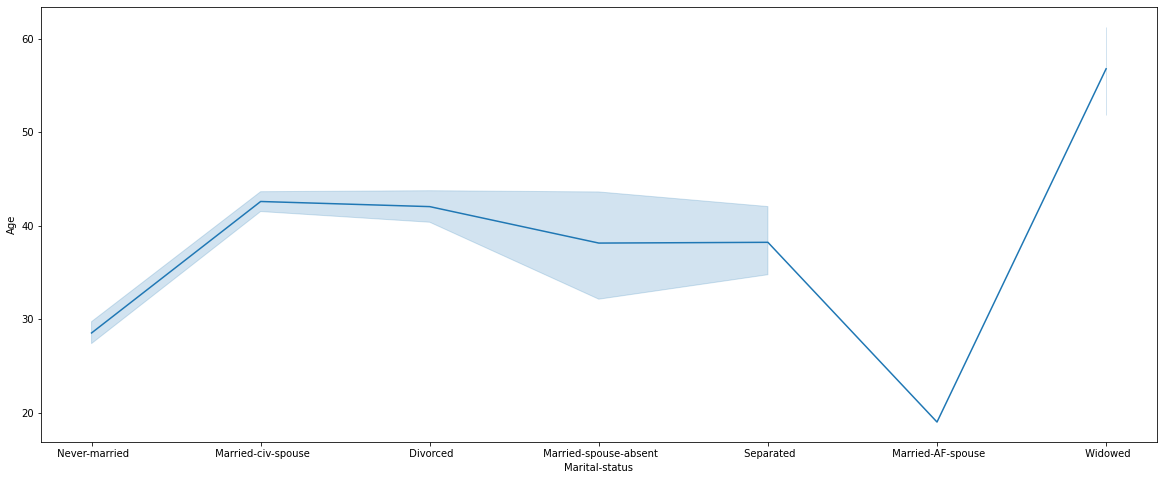

In [70]:
fig, a = plt.subplots(figsize=(20,8))
sns.lineplot(x="Marital-status", y="Age", data=df_data)

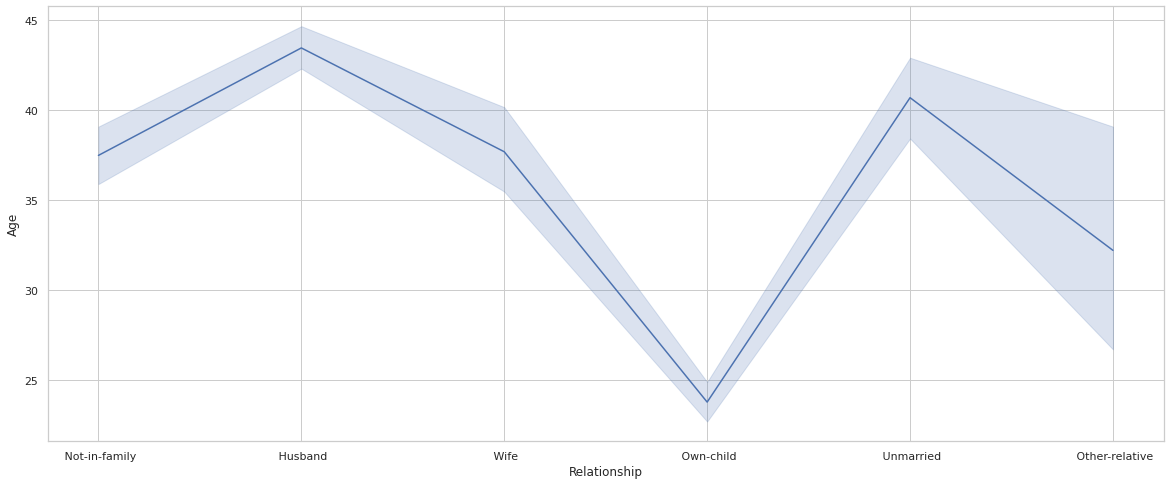

In [47]:
fig, a = plt.subplots(figsize=(20,8))
sns.lineplot(x="Relationship", y="Age", data=df_data)

## Not-in-family Individual   

Mean Age : 37.48

Age Group :36 - 44 years

## Divorced Individual

Mean Age: 42.03

Age Group : 39 - 46 years

It is Correct to say that Divorced Individual are more in age than the Not-in-family individual.
